In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import json
import glob
import config
import re
import jax.numpy as jnp
import nicewebrl
from typing import List
from collections import defaultdict
from flax import serialization
import polars as pl
from glob import glob

import jax

import config
from experiment_structure import describe_ruleset

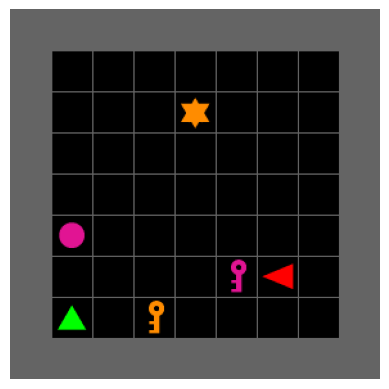

GOAL:
Tile_Near_Right_Goal(yellow goal, red hexagon)

RULES:
AgentNearUpRule(green hexagon) -> red hexagon
AgentHold(orange pyramid) -> yellow goal
AgentNearLeftRule(white star) -> orange pyramid
AgentNearDownRule(pink star) -> green hexagon
AgentNearRightRule(pink ball) -> pink star
TileNearRightRule(green pyramid, orange key) -> white star
AgentNearRightRule(pink key) -> green ball

INIT TILES:
pink ball
green pyramid
orange key
orange star
pink key



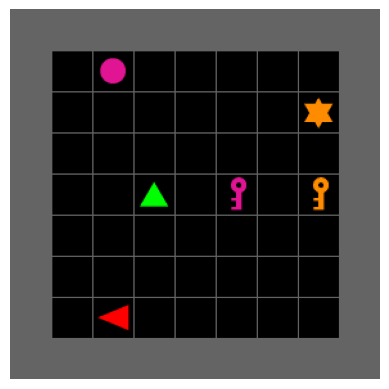

GOAL:
Tile_Near_Right_Goal(yellow goal, red hexagon)

RULES:
AgentNearUpRule(green hexagon) -> red hexagon
AgentHold(orange pyramid) -> yellow goal
AgentNearLeftRule(white star) -> orange pyramid
AgentNearDownRule(pink star) -> green hexagon
AgentNearRightRule(pink ball) -> pink star
TileNearRightRule(green pyramid, orange key) -> white star
AgentNearRightRule(pink key) -> green ball

INIT TILES:
pink ball
green pyramid
orange key
orange star
pink key



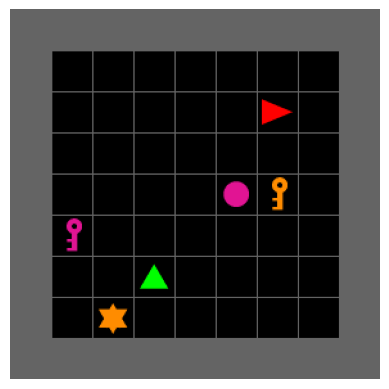

GOAL:
Tile_Near_Right_Goal(yellow goal, red hexagon)

RULES:
AgentNearUpRule(green hexagon) -> red hexagon
AgentHold(orange pyramid) -> yellow goal
AgentNearLeftRule(white star) -> orange pyramid
AgentNearDownRule(pink star) -> green hexagon
AgentNearRightRule(pink ball) -> pink star
TileNearRightRule(green pyramid, orange key) -> white star
AgentNearRightRule(pink key) -> green ball

INIT TILES:
pink ball
green pyramid
orange key
orange star
pink key



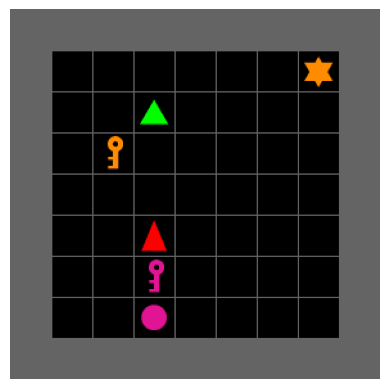

GOAL:
Tile_Near_Right_Goal(yellow goal, red hexagon)

RULES:
AgentNearUpRule(green hexagon) -> red hexagon
AgentHold(orange pyramid) -> yellow goal
AgentNearLeftRule(white star) -> orange pyramid
AgentNearDownRule(pink star) -> green hexagon
AgentNearRightRule(pink ball) -> pink star
TileNearRightRule(green pyramid, orange key) -> white star
AgentNearRightRule(pink key) -> green ball

INIT TILES:
pink ball
green pyramid
orange key
orange star
pink key



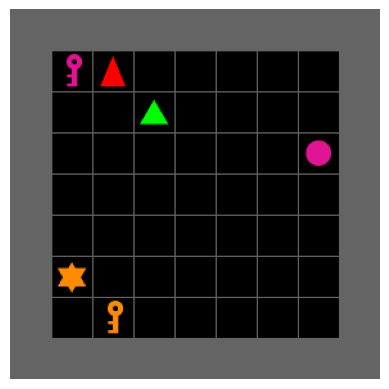

GOAL:
Tile_Near_Right_Goal(yellow goal, red hexagon)

RULES:
AgentNearUpRule(green hexagon) -> red hexagon
AgentHold(orange pyramid) -> yellow goal
AgentNearLeftRule(white star) -> orange pyramid
AgentNearDownRule(pink star) -> green hexagon
AgentNearRightRule(pink ball) -> pink star
TileNearRightRule(green pyramid, orange key) -> white star
AgentNearRightRule(pink key) -> green ball

INIT TILES:
pink ball
green pyramid
orange key
orange star
pink key



In [ ]:
from xminigrid.experimental.img_obs import RGBImgObservationWrapper
import jax
import matplotlib.pyplot as plt
import xminigrid
from rendering import render

def create_env_with_ruleset(ruleset_key):
  env, env_params = xminigrid.make("XLand-MiniGrid-R1-9x9")
  benchmark = xminigrid.load_benchmark(name="high-1m")
  rule = benchmark.sample_ruleset(jax.random.key(ruleset_key))
  rule_text = describe_ruleset(rule)

  env_params = env_params.replace(
    ruleset=rule,
    max_steps=50,
    view_size=11,
  )
  env = RGBImgObservationWrapper(env)
  return env, benchmark, env_params, rule_text


env, benchmark, env_params2, rule_text = create_env_with_ruleset(0)
for idx in range(15):
    rng = jax.random.PRNGKey(idx)
    example_timestep = env.reset(env_params2, rng)
    # print('position:',  example_timestep.state.agent.position)
    
    # render = jax.jit(render)
    with jax.disable_jit():
      plt.imshow(render(example_timestep.state.grid, example_timestep.state.agent))
    plt.axis("off")
    plt.show()
    
    
    ruleset = env_params2.ruleset
    rule_text = describe_ruleset(ruleset)
    print(rule_text)

direction: 2


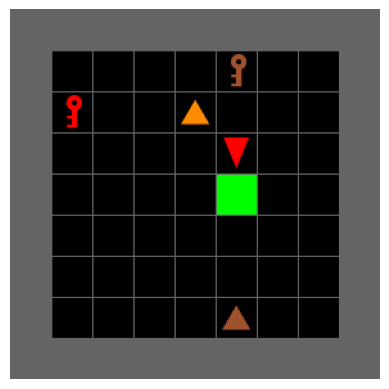

In [19]:
clockwise = 1
timestep = env.step(env_params2, example_timestep, clockwise)
# print('position:',  example_timestep.state.agent.position)
print("direction:", timestep.state.agent.direction)
from rendering import render

# render = jax.jit(render)
with jax.disable_jit():
  plt.imshow(render(timestep.state.grid, timestep.state.agent))
plt.axis("off")
plt.show()

direction: 2


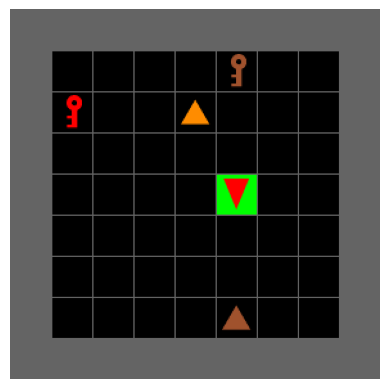

In [20]:
forward = 0
timestep = env.step(env_params2, timestep, forward)
# print('position:',  example_timestep.state.agent.position)
print("direction:", timestep.state.agent.direction)
from rendering import render

# render = jax.jit(render)
with jax.disable_jit():
  plt.imshow(render(timestep.state.grid, timestep.state.agent))
plt.axis("off")
plt.show()

In [22]:
jax.tree_map(type, env_params2)

XLandEnvParams(height=9, width=9, view_size=11, max_steps=50, render_mode='rgb_array', ruleset=RuleSet(goal=<class 'jaxlib.xla_extension.ArrayImpl'>, rules=<class 'jaxlib.xla_extension.ArrayImpl'>, init_tiles=<class 'jaxlib.xla_extension.ArrayImpl'>), grid_type='R1')